# Paths 

In [24]:
output_path = '/ADNI/output'
logger.setLevel(logging.DEBUG)
logger = logging.getLogger()

In [25]:
import nipype.interfaces.io as nio
import logging
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nb
from nipype import DataGrabber, Node

In [156]:
input_node = Node(DataGrabber(infields=['subject_id'], outfields=['out_file']), name="input_node")
input_node.inputs.base_directory = '/ADNI'
input_node.inputs.template = '*_S_*/MPR__GradWarp__B1_Correction__N3__Scaled*/*/S*/ADNI_*_S_*_MR_MPR__GradWarp__B1_Correction__N3__Scaled*_Br_*_S*_I%s.nii'
input_node.inputs.sort_filelist = True
input_node.inputs.subject_id = [118692, 45108,40966]


In [157]:
from nipype import Node, Workflow, MapNode
from nipype.interfaces.fsl import BET

# Skull stripping Node with BET 
skullstrip = MapNode(BET(mask=True), name="skullstrip", iterfield=['in_file'])

In [168]:
!pwd

/home/neuro/nipype_tutorial/my_ntb


In [158]:
sink = Node(interface=nio.DataSink(),
                   name='sink')
sink.inputs.base_directory = output_path

200223-10:30:29,854 nipype.workflow INFO:
	 Generated workflow graph: /home/neuro/nipype_tutorial/my_ntb/graph.png (graph2use=flat, simple_form=True).


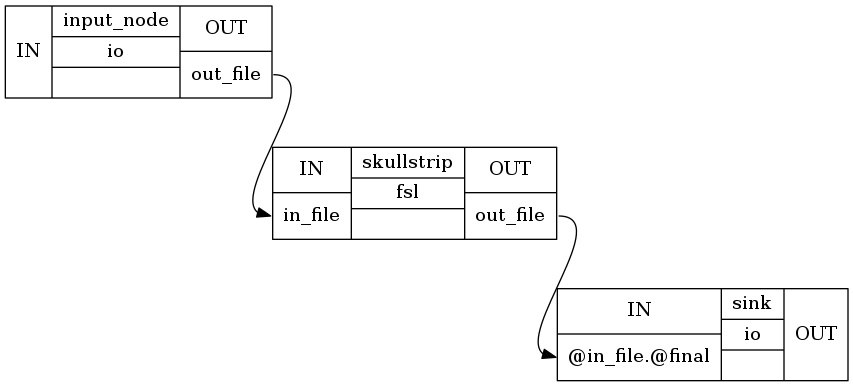

In [159]:
preproc = Workflow(name='preproc')
preproc.connect([(input_node, skullstrip,[('out_file', 'in_file')]),
                (skullstrip,sink, [('out_file', '@in_file.@final')])])
# Create preproc output graph
preproc.write_graph(graph2use='flat', format='png', simple_form=True)
from IPython.display import Image
Image('/home/neuro/nipype_tutorial/my_ntb/graph_detailed.png')

In [160]:
%time preproc.run()

200223-10:30:36,782 nipype.workflow INFO:
	 Workflow preproc settings: ['check', 'execution', 'logging', 'monitoring']
200223-10:30:36,972 nipype.workflow INFO:
	 Running serially.
200223-10:30:36,975 nipype.workflow INFO:
	 [Node] Setting-up "preproc.input_node" in "/tmp/tmp56uqh7m1/preproc/input_node".
200223-10:30:36,981 nipype.workflow INFO:
	 [Node] Running "input_node" ("nipype.interfaces.io.DataGrabber")
200223-10:30:54,907 nipype.workflow INFO:
	 [Node] Finished "preproc.input_node".
200223-10:30:54,908 nipype.workflow INFO:
	 [Node] Setting-up "preproc.skullstrip" in "/tmp/tmpcjt6samt/preproc/skullstrip".
200223-10:30:54,918 nipype.workflow INFO:
	 [Node] Setting-up "_skullstrip0" in "/tmp/tmpcjt6samt/preproc/skullstrip/mapflow/_skullstrip0".
200223-10:30:54,923 nipype.workflow INFO:
	 [Node] Running "_skullstrip0" ("nipype.interfaces.fsl.preprocess.BET"), a CommandLine Interface with command:
bet /ADNI/002_S_0295/MPR__GradWarp__B1_Correction__N3__Scaled_2/2006-11-02_08_16_44.

In [161]:
%time preproc.run(plugin='MultiProc', plugin_args={'n_procs' : 4})

200223-10:31:29,704 nipype.workflow INFO:
	 Workflow preproc settings: ['check', 'execution', 'logging', 'monitoring']
200223-10:31:29,899 nipype.workflow INFO:
	 Running in parallel.
200223-10:31:29,919 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 1.76/1.76, Free processors: 4/4.
200223-10:31:30,178 nipype.workflow INFO:
	 [Node] Setting-up "preproc.input_node" in "/tmp/tmpf0kw2f7t/preproc/input_node".
200223-10:31:30,237 nipype.workflow INFO:
	 [Node] Running "input_node" ("nipype.interfaces.io.DataGrabber")
200223-10:31:31,918 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 1.56/1.76, Free processors: 3/4.
                     Currently running:
                       * preproc.input_node
200223-10:31:45,419 nipype.workflow INFO:
	 [Node] Finished "preproc.input_node".
200223-10:31:45,928 nipype.workflow INFO:
	 [Job 0] Completed (preproc.input_node).
200223-10:31:45,936 nipype.workflow INFO:
	 [Mul

In [75]:
from nilearn import image, plotting

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


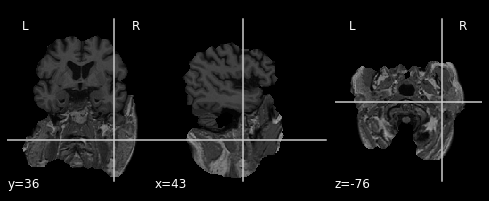

In [87]:
%matplotlib inline
plotting.plot_anat(
    '/ADNI/output/_skullstrip0/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_brain.nii.gz')

In [82]:
!ls /ADNI/output/_skullstrip0/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_brain.nii.gz

ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108_brain.nii.gz


In [164]:
# With iterables
from nipype import IdentityInterface
infosource = Node(IdentityInterface(fields=['image_id']),
                  name="infosource")
infosource.iterables = [('image_id', [118692, 45108,40966])]

input_node2 = Node(DataGrabber(infields=['image_id'], outfields=['out_file']), name="input_node")
input_node2.inputs.base_directory = '/ADNI'
input_node2.inputs.template = '*_S_*/MPR__GradWarp__B1_Correction__N3__Scaled*/*/S*/ADNI_*_S_*_MR_MPR__GradWarp__B1_Correction__N3__Scaled*_Br_*_S*_I%d.nii'
input_node2.inputs.sort_filelist = False

# Skull stripping Node with BET 
skullstrip2 = Node(BET(mask=True), name="skullstrip", iterfield=['in_file'])

sink = Node(interface=nio.DataSink(),
                   name='sink')
sink.inputs.base_directory = '/ADNI/wf2'


wf2 = Workflow(name="Preprocess2")
wf2.connect(infosource, "image_id", input_node2, "image_id")
wf2.connect(input_node2, "out_file", skullstrip2, "in_file")
wf2.connect(skullstrip2, "out_file",sink, "stripped")

200223-10:59:04,927 nipype.workflow INFO:
	 Generated workflow graph: /home/neuro/nipype_tutorial/my_ntb/graph.png (graph2use=flat, simple_form=True).


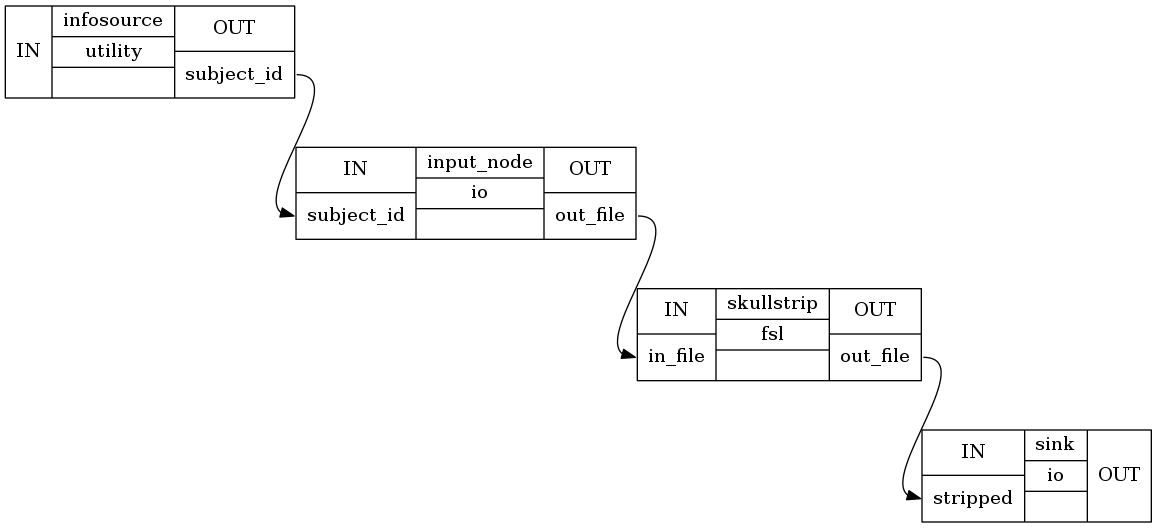

In [165]:
wf2.write_graph(graph2use='flat', format='png', simple_form=True)
from IPython.display import Image
Image('/home/neuro/nipype_tutorial/my_ntb/graph_detailed.png')

In [162]:
%time wf2.run(plugin='MultiProc', plugin_args={'n_procs' : 4})

200223-10:32:51,305 nipype.workflow INFO:
	 Workflow Preprocess2 settings: ['check', 'execution', 'logging', 'monitoring']
200223-10:32:51,527 nipype.workflow INFO:
	 Running in parallel.
200223-10:32:51,533 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 3 jobs ready. Free memory (GB): 1.76/1.76, Free processors: 4/4.
200223-10:32:51,763 nipype.workflow INFO:
	 [Node] Setting-up "Preprocess2.input_node" in "/tmp/tmp7k5kmhh0/Preprocess2/_subject_id_45108/input_node".200223-10:32:51,766 nipype.workflow INFO:
	 [Node] Setting-up "Preprocess2.input_node" in "/tmp/tmpfv89ywof/Preprocess2/_subject_id_118692/input_node".
200223-10:32:51,779 nipype.workflow INFO:
	 [Node] Running "input_node" ("nipype.interfaces.io.DataGrabber")
200223-10:32:51,787 nipype.workflow INFO:
	 [Node] Running "input_node" ("nipype.interfaces.io.DataGrabber")

200223-10:32:51,761 nipype.workflow INFO:
	 [Node] Setting-up "Preprocess2.input_node" in "/tmp/tmpp9yn8wue/Preprocess2/_subject_id_40966/input_node"

In [ ]:
!ls /ADNI

In [167]:
import pandas as pd 

In [171]:
!ls /ADNI/

002_S_0295
002_S_0413
002_S_0619
002_S_0685
002_S_0729
002_S_0782
002_S_0816
002_S_0938
002_S_0954
002_S_1018
002_S_1070
002_S_1155
002_S_1261
002_S_1268
002_S_1280
003_S_0907
003_S_0908
003_S_0981
003_S_1057
003_S_1122
005_S_0221
005_S_0222
005_S_0223
005_S_0324
005_S_0448
005_S_0546
005_S_0553
005_S_0602
005_S_0610
005_S_0814
005_S_1224
005_S_1341
006_S_0498
006_S_0547
006_S_0675
006_S_0681
006_S_0731
006_S_1130
007_S_0041
007_S_0068
007_S_0070
007_S_0101
007_S_0128
007_S_0249
007_S_0293
007_S_0316
007_S_0414
007_S_0698
007_S_1206
007_S_1222
007_S_1339
009_S_0751
009_S_0842
009_S_0862
009_S_1030
010_S_0067
010_S_0419
010_S_0422
010_S_0472
010_S_0786
010_S_0829
010_S_0904
011_S_0010
011_S_0022
011_S_0023
011_S_0053
011_S_0168
011_S_0183
011_S_0241
011_S_0326
011_S_0362
011_S_0856
011_S_0861
011_S_1080
011_S_1282
012_S_0634
012_S_0637
012_S_0689
012_S_0712
012_S_0720
012_S_0803
012_S_0932
012_S_1009
012_S_1033
012_S_1133
012_S_1165
012_S_1292
012_S_1321
013_S_0240
013_S_0325
013_S_0502

ADNI_027_S_0179_MPR-R__GradWarp__B1_Correction__N3__Scaled_S28889_I65293.xml
ADNI_027_S_0256_MPR__GradWarp__B1_Correction__N3__Scaled_S29475_I65999.xml
ADNI_027_S_0307_MPR__GradWarp__B1_Correction__N3__Scaled_S31877_I65298.xml
ADNI_027_S_0307_MPR-R__GradWarp__B1_Correction__N3__Scaled_S20691_I86179.xml
ADNI_027_S_0403_MPR__GradWarp__B1_Correction__N3__Scaled_S32438_I70692.xml
ADNI_027_S_0403_MPR-R__GradWarp__B1_Correction__N3__Scaled_S21484_I47047.xml
ADNI_027_S_0404_MPR__GradWarp__B1_Correction__N3__Scaled_S22758_I47091.xml
ADNI_027_S_0404_MPR__GradWarp__B1_Correction__N3__Scaled_S32020_I82214.xml
ADNI_027_S_0408_MPR__GradWarp__B1_Correction__N3__Scaled_S14231_I37548.xml
ADNI_027_S_0408_MPR__GradWarp__B1_Correction__N3__Scaled_S22824_I79326.xml
ADNI_027_S_0408_MPR__GradWarp__B1_Correction__N3__Scaled_S32849_I92534.xml
ADNI_027_S_0417_MPR__GradWarp__B1_Correction__N3__Scaled_S23525_I47514.xml
ADNI_027_S_0417_MPR-R__GradWarp__B1_Correction__N3__Scaled_S32650_I89943.xml
ADNI_027_S_0461_M